In [12]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2

train_dir = 'C:/Users/rgmc2/Training_FER/train/Disgust/'
val_dir = 'C:/Users/rgmc2/Training_FER/validation/Disgust'

#path_train=os.path.join(train_dir,img_name)
#path_val=os.path.join(val_dir,img_name)

        
for img in os.listdir(val_dir):
        img_array=cv2.imread(os.path.join(val_dir,img))
        new_array=cv2.resize(img_array,(48,48))
        cv2.imwrite(new_array)
        
                

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - imwrite() missing required argument 'img' (pos 2)
>  - imwrite() missing required argument 'img' (pos 2)


In [11]:
import cv2
img_array=cv2.imread("C:/Users/rgmc2/Training_FER/train/Disgust/364961330_35f505a386_b_face.png")
print (img_array.shape)

(224, 224, 3)


In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D,BatchNormalization, LSTM, CuDNNLSTM, MaxPooling2D
from keras.models import Sequential
from keras import regularizers
import keras

from keras.layers import TimeDistributed
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2

 

train_dir = 'C:/Users/rgmc2/Training_FER/train'
val_dir = 'C:/Users/rgmc2/Training_FER/validation'


image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2
)    

training_set = image_generator.flow_from_directory(batch_size=256,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                )
testing_set = image_generator.flow_from_directory(batch_size=128,
                                                 directory=val_dir,
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                 )


training_set.class_indices
     

Found 28792 images belonging to 7 classes.
Found 3973 images belonging to 7 classes.


{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [16]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = "adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [17]:
hist = model.fit_generator(training_set, validation_data = testing_set , epochs = 10)

C:\Users\rgmc2\AppData\Local\Temp\ipykernel_17992\3542376353.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(training_set, validation_data = testing_set , epochs = 10)


Epoch 1/10
113/113 [==============================] - 1069s 9s/step - loss: 7.0382 - accuracy: 0.2150 - val_loss: 4.5431 - val_accuracy: 0.2212
Epoch 2/10
113/113 [==============================] - 1097s 10s/step - loss: 2.9817 - accuracy: 0.2599 - val_loss: 3.0515 - val_accuracy: 0.1744
Epoch 3/10
113/113 [==============================] - 1045s 9s/step - loss: 2.2302 - accuracy: 0.3489 - val_loss: 2.5945 - val_accuracy: 0.1835
Epoch 4/10
113/113 [==============================] - 1120s 10s/step - loss: 2.0684 - accuracy: 0.4224 - val_loss: 2.9376 - val_accuracy: 0.1712
Epoch 5/10
113/113 [==============================] - 1163s 10s/step - loss: 2.0538 - accuracy: 0.4633 - val_loss: 2.4524 - val_accuracy: 0.3270
Epoch 6/10
113/113 [==============================] - 1056s 9s/step - loss: 2.0163 - accuracy: 0.4871 - val_loss: 2.5540 - val_accuracy: 0.3919
Epoch 7/10
113/113 [==============================] - 1010s 9s/step - loss: 1.9820 - accuracy: 0.5033 - val_loss: 2.5668 - val_accura

In [18]:
    hist = hist.history

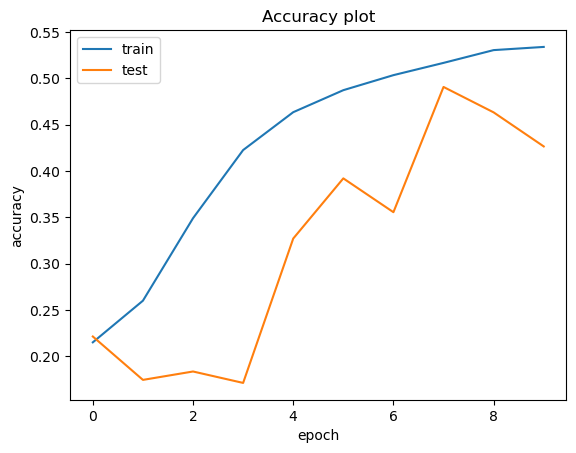

In [19]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("CNNv2_accuracy.png")

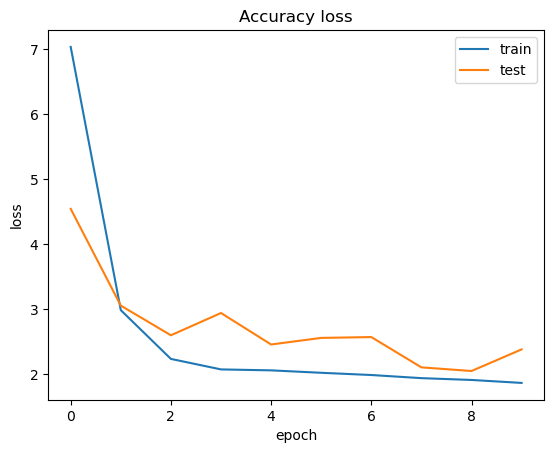

In [20]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("CNNv2_loss.png")

In [21]:
model.save("CNNv2.h5")